# Power of Python and Julia for Advanced Data Analysis

Python and Julia are two powerful languages that are transforming data analysis in high-energy physics (HEP).

Let's start by exploring why Python remains a go-to language for data analysis, and then pivot to Julia, which is gaining recognition for its impressive speed and suitability for scientific applications.

In [1]:
import awkward as ak

It is important to set your Python environment and install all needed Python packages first.

For example, to read data from a Parquet file you will need:
```
pip install parquet
pip install pyarrow
pip install pandas
```

In [2]:
events = ak.from_parquet("./data/SMHiggsToZZTo4L.parquet")

In [3]:
events.muon

<Array [[{pt: 63, eta: -0.719, ...}, ...], ...] type='299973 * var * Moment...'>

In [4]:
muplus = events.muon[events.muon.charge > 0]
muminus = events.muon[events.muon.charge < 0]

In [5]:
mu1, mu2 = ak.unzip(ak.cartesian((muplus, muminus)))

In [6]:
import matplotlib.pyplot as plt
import numpy as np

import vector
vector.register_awkward()

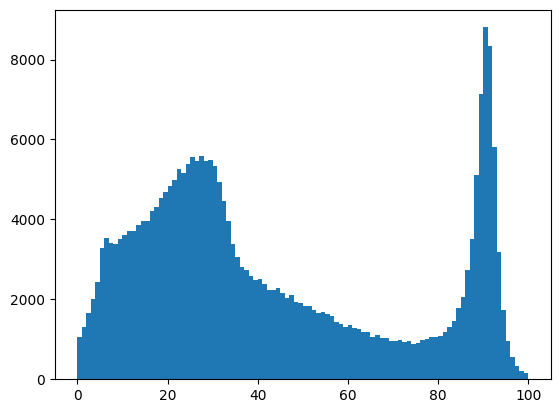

In [7]:
plt.hist(ak.ravel(
    
    (mu1 + mu2).mass

), bins=100, range=(0, 100));

## Embedding Julia code into Python scripts

We can use PythonCall for integrating Python’s vast ecosystem into Julia projects and JuliaCall for embedding high-performance Julia code into Python scripts.

You’ll see how easy it is to blend these languages and why it’s worth the effort.

In [8]:
from juliacall import Main as jl

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


### Data exchange between Julia and Python

[AwkwardArray.jl](https://github.com/JuliaHEP/AwkwardArray.jl) package - Awkward Array in Julia mirrors the Python library, enabling effortless zero-copy data exchange between Julia and Python.

#### 1. Write Julia code in a sepatate file:

```julia
using AwkwardArray

function f1(x)
  print(typeof(x))
  return AwkwardArray.convert(x)
end;
```

In [9]:
%cat test_funcs.jl

using AwkwardArray

function f1(x)
  print(typeof(x))
  return AwkwardArray.convert(x)
end;

#### 2. Include Julia code from a sepatate Julia file:

In [10]:
jl.include('test_funcs.jl')

f1 (generic function with 1 method)

#### Note: this is equivalent to executing the following two cells

Julia code is written as Python strings.

In [11]:
jl.seval("using AwkwardArray")

Let's check the data type of data:

In [12]:
jl.seval("""
function f1(x)
  print(typeof(x))
  return AwkwardArray.convert(x)
end;
""")

f1 (generic function with 1 method)

#### 3. Pass Python Awkward Array to Julia function:

In [13]:
events.show(type=True)

type: 299973 * {
    run: int32,
    luminosityBlock: int64,
    event: uint64,
    PV: Vector3D[
        x: float32,
        y: float32,
        z: float32
    ],
    electron: var * Momentum4D[
        pt: float32,
        eta: float32,
        phi: float32,
        mass: float32,
        charge: int32,
        pfRelIso03_all: float32,
        dxy: float32,
        dxyErr: float32,
        dz: float32,
        dzErr: float32
    ],
    muon: var * Momentum4D[
        pt: float32,
        eta: float32,
        phi: float32,
        mass: float32,
        charge: int32,
        pfRelIso03_all: float32,
        pfRelIso04_all: float32,
        dxy: float32,
        dxyErr: float32,
        dz: float32,
        dzErr: float32
    ],
    MET: Momentum2D[
        pt: float32,
        phi: float32
    ]
}
[{run: 1, luminosityBlock: 156, event: 46501, PV: {...}, electron: [], ...},
 {run: 1, luminosityBlock: 156, event: 46502, PV: {...}, electron: [...], ...},
 {run: 1, luminosityBlock: 156,

In [14]:
arr = jl.f1(events)

AwkwardArray.RecordArray{(:run, :luminosityBlock, :event, :PV, :electron, :muon, :MET), Tuple{AwkwardArray.PrimitiveArray{Int32, SubArray{Int32, 1, Base.ReinterpretArray{Int32, 1, UInt8, Vector{UInt8}, false}, Tuple{UnitRange{Int64}}, true}, :default}, AwkwardArray.PrimitiveArray{Int64, SubArray{Int64, 1, Base.ReinterpretArray{Int64, 1, UInt8, Vector{UInt8}, false}, Tuple{UnitRange{Int64}}, true}, :default}, AwkwardArray.PrimitiveArray{Int64, SubArray{Int64, 1, Base.ReinterpretArray{Int64, 1, UInt8, Vector{UInt8}, false}, Tuple{UnitRange{Int64}}, true}, :default}, AwkwardArray.RecordArray{(:x, :y, :z), Tuple{AwkwardArray.PrimitiveArray{Float32, SubArray{Float32, 1, Base.ReinterpretArray{Float32, 1, UInt8, Vector{UInt8}, false}, Tuple{UnitRange{Int64}}, true}, :default}, AwkwardArray.PrimitiveArray{Float32, SubArray{Float32, 1, Base.ReinterpretArray{Float32, 1, UInt8, Vector{UInt8}, false}, Tuple{UnitRange{Int64}}, true}, :default}, AwkwardArray.PrimitiveArray{Float32, SubArray{Float32,

In [15]:
arr

<Array [{run: 1, ...}, ..., {run: 1, ...}] type='299973 * {run: int32, lumi...'>

In [16]:
type(arr)

awkward.highlevel.Array

In [17]:
arr.show(type=True)

type: 299973 * {
    run: int32,
    luminosityBlock: int64,
    event: int64,
    PV: Vector3D[
        x: float32,
        y: float32,
        z: float32
    ],
    electron: var * Momentum4D[
        pt: float32,
        eta: float32,
        phi: float32,
        mass: float32,
        charge: int32,
        pfRelIso03_all: float32,
        dxy: float32,
        dxyErr: float32,
        dz: float32,
        dzErr: float32
    ],
    muon: var * Momentum4D[
        pt: float32,
        eta: float32,
        phi: float32,
        mass: float32,
        charge: int32,
        pfRelIso03_all: float32,
        pfRelIso04_all: float32,
        dxy: float32,
        dxyErr: float32,
        dz: float32,
        dzErr: float32
    ],
    MET: Momentum2D[
        pt: float32,
        phi: float32
    ]
}
[{run: 1, luminosityBlock: 156, event: 46501, PV: {...}, electron: [], ...},
 {run: 1, luminosityBlock: 156, event: 46502, PV: {...}, electron: [...], ...},
 {run: 1, luminosityBlock: 156, 

## Faster, more efficient data processing

Let's combine Python and Julia:

In [18]:
one_event = jl.first(events)

In [19]:
one_event

{run: 1, luminosityBlock: 156, event: 46501, PV: {x: ..., ...}, ...}

In [20]:
type(one_event)

juliacall.AnyValue

In [21]:
jl.one_event = one_event

In [22]:
events.muon

<MomentumArray4D [[{pt: 63, eta: -0.719, ...}, ...], ...] type='299973 * va...'>

In [23]:
jl.Muon_pt = events.muon.pt

In [24]:
jl.Muon_eta = events.muon.eta

In [25]:
jl.Muon_phi = events.muon.phi

In [26]:
jl.Muon_mass = events.muon.mass

In [27]:
jl.Muon_charge = events.muon.charge

In [28]:
jl.Muon_pt

299973-element AwkwardArray.ListOffsetArray{SubArray{Int64, 1, Base.ReinterpretArray{Int64, 1, UInt8, Vector{UInt8}, false}, Tuple{UnitRange{Int64}}, true}, AwkwardArray.PrimitiveArray{Float32, SubArray{Float32, 1, Base.ReinterpretArray{Float32, 1, UInt8, Vector{UInt8}, false}, Tuple{UnitRange{Int64}}, true}, :default}, :default}:
 [63.04387f0, 38.120346f0, 4.0486875f0]
 0-element AwkwardArray.PrimitiveArray{Float32, Vector{Float32}, :default}
 0-element AwkwardArray.PrimitiveArray{Float32, Vector{Float32}, :default}
 [54.33275f0, 23.515282f0, 52.871075f0, ..., 8.393386f0, 3.4901235f0]
 0-element AwkwardArray.PrimitiveArray{Float32, Vector{Float32}, :default}
 [38.503757f0, 47.00221f0]
 [4.453538f0]
 0-element AwkwardArray.PrimitiveArray{Float32, Vector{Float32}, :default}
 0-element AwkwardArray.PrimitiveArray{Float32, Vector{Float32}, :default}
 0-element AwkwardArray.PrimitiveArray{Float32, Vector{Float32}, :default}
 ⋮
 [37.18836f0, 50.064648f0]
 [43.15527f0, 23.953928f0]
 [24.2498

In [29]:
jl.first(events.muon.charge, 4)

4-element AwkwardArray.ListOffsetArray{Vector{Int64}, AwkwardArray.PrimitiveArray{Int32, SubArray{Int32, 1, Base.ReinterpretArray{Int32, 1, UInt8, Vector{UInt8}, false}, Tuple{UnitRange{Int64}}, true}, :default}, :default}:
 [1, -1, 1]
 0-element AwkwardArray.PrimitiveArray{Int32, Vector{Int32}, :default}
 0-element AwkwardArray.PrimitiveArray{Int32, Vector{Int32}, :default}
 [1, -1, -1, 1, -1, -1, 1]

Awkward Array implements the convertion rules between Python and Julia Awkward types:

In [30]:
events_from_julia = jl.AwkwardArray.convert(events)

In [31]:
type(events_from_julia)

awkward.highlevel.Array

In [32]:
events_from_julia.show(type=True)

type: 299973 * {
    run: int32,
    luminosityBlock: int64,
    event: int64,
    PV: Vector3D[
        x: float32,
        y: float32,
        z: float32
    ],
    electron: var * Momentum4D[
        pt: float32,
        eta: float32,
        phi: float32,
        mass: float32,
        charge: int32,
        pfRelIso03_all: float32,
        dxy: float32,
        dxyErr: float32,
        dz: float32,
        dzErr: float32
    ],
    muon: var * Momentum4D[
        pt: float32,
        eta: float32,
        phi: float32,
        mass: float32,
        charge: int32,
        pfRelIso03_all: float32,
        pfRelIso04_all: float32,
        dxy: float32,
        dxyErr: float32,
        dz: float32,
        dzErr: float32
    ],
    MET: Momentum2D[
        pt: float32,
        phi: float32
    ]
}
[{run: 1, luminosityBlock: 156, event: 46501, PV: {...}, electron: [], ...},
 {run: 1, luminosityBlock: 156, event: 46502, PV: {...}, electron: [...], ...},
 {run: 1, luminosityBlock: 156, 

In [33]:
events.muon.show(type=True)

type: 299973 * var * Momentum4D[
    pt: float32,
    eta: float32,
    phi: float32,
    mass: float32,
    charge: int32,
    pfRelIso03_all: float32,
    pfRelIso04_all: float32,
    dxy: float32,
    dxyErr: float32,
    dz: float32,
    dzErr: float32
]
[[{pt: 63, eta: -0.719, phi: 2.97, mass: 0.106, charge: 1, ...}, ..., {...}],
 [],
 [],
 [{pt: 54.3, eta: -1.06, phi: -0.362, mass: 0.106, charge: 1, ...}, ..., {...}],
 [],
 [{pt: 38.5, eta: 0.315, phi: 2.05, mass: 0.106, charge: -1, ...}, {...}],
 [{pt: 4.45, eta: -0.986, phi: 1.12, mass: 0.106, charge: 1, ...}],
 [],
 [],
 [],
 ...,
 [{pt: 37.2, eta: 1.1, phi: -0.875, mass: 0.106, charge: -1, ...}, {...}],
 [{pt: 43.2, eta: 2.15, phi: -1.3, mass: 0.106, charge: 1, ...}, {...}],
 [{pt: 24.2, eta: 0.327, phi: -0.997, mass: 0.106, charge: -1, ...}, ...],
 [],
 [{pt: 9.81, eta: 2.07, phi: 1.66, mass: 0.106, charge: 1, ...}, {...}],
 [{pt: 32.6, eta: 1.11, phi: -0.981, mass: 0.106, charge: 1, ...}, {...}],
 [{pt: 4.32, eta: -2.09, ph